# Time series forecasting 

In [109]:
import os
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (14, 10)
mpl.rcParams['axes.grid'] = False

## Data loading

Load dataset and rename columns to understandable formats

In [110]:
DATA_PATH = "extract.txt"

cols_map = {
    "DTS": "crossTime",
    "LANE": "lane",
    "DIR": "direction",
    "SPD": "speed",
    "AX": "nAxles",
    "GW_TOT": "weight",
    "TYPE": "type",
}

columns = list(cols_map.values())

df = pd.read_csv(DATA_PATH, usecols=cols_map.keys())
df.rename(columns=cols_map, inplace=True)

df.head()

,crossTime,lane,direction,speed,nAxles,weight,type
0,20000104T000557,1,1,101,2,17930,11
1,20000104T002824,1,1,83,2,5230,11
2,20000104T003457,1,1,84,2,8310,11
3,20000104T011414,1,1,89,2,7550,11
4,20000104T022526,1,1,104,3,20930,12


Parse crossing time as datetime

In [111]:
df.crossTime = pd.to_datetime(df.crossTime, format="%Y%m%dT%H%M%S")
df.head()

,crossTime,lane,direction,speed,nAxles,weight,type
0,2000-01-04 00:05:57,1,1,101,2,17930,11
1,2000-01-04 00:28:24,1,1,83,2,5230,11
2,2000-01-04 00:34:57,1,1,84,2,8310,11
3,2000-01-04 01:14:14,1,1,89,2,7550,11
4,2000-01-04 02:25:26,1,1,104,3,20930,12


Check to see if there is any invalid data

In [112]:
df.isna().sum()

crossTime    0
lane         0
direction    0
speed        0
nAxles       0
weight       0
type         0
dtype: int64

Convert feature "type" to categorical type

In [113]:
df['type'] = df.type.astype('category')

In [114]:
df

,crossTime,lane,direction,speed,nAxles,weight,type
0,2000-01-04 00:05:57,1,1,101,2,17930,11
1,2000-01-04 00:28:24,1,1,83,2,5230,11
2,2000-01-04 00:34:57,1,1,84,2,8310,11
3,2000-01-04 01:14:14,1,1,89,2,7550,11
4,2000-01-04 02:25:26,1,1,104,3,20930,12
...,...,...,...,...,...,...,...
9994,2000-01-13 05:09:23,1,1,92,4,9960,112
9995,2000-01-13 05:09:57,1,1,91,2,11060,11
9996,2000-01-13 05:14:12,1,1,88,5,14810,122
9997,2000-01-13 05:18:25,1,1,86,3,12340,12


## Initial data explortation

Compute summary statistics

In [115]:
df.describe()

,lane,direction,speed,nAxles,weight
count,9999.0,9999.0,9999.000000,9999.000000,9999.000000
mean,1.0,1.0,88.238024,3.225723,12335.469547
std,0.0,0.0,7.028601,1.111846,6135.098224
min,1.0,1.0,21.000000,2.000000,3500.000000
25%,1.0,1.0,85.000000,2.000000,7630.000000
50%,1.0,1.0,88.000000,3.000000,11440.000000
75%,1.0,1.0,89.000000,4.000000,15630.000000
max,1.0,1.0,184.000000,8.000000,52440.000000


Find the date range of our data

In [116]:
mn, mx = df.crossTime.min(), df.crossTime.max()
print(f"Our data ranges from {mn} to {mx}, ranging a period of {mx - mn}")

Our data ranges from 2000-01-04 00:05:57 to 2000-01-13 05:21:11, ranging a period of 9 days 05:15:14


Explore the other columns of the data

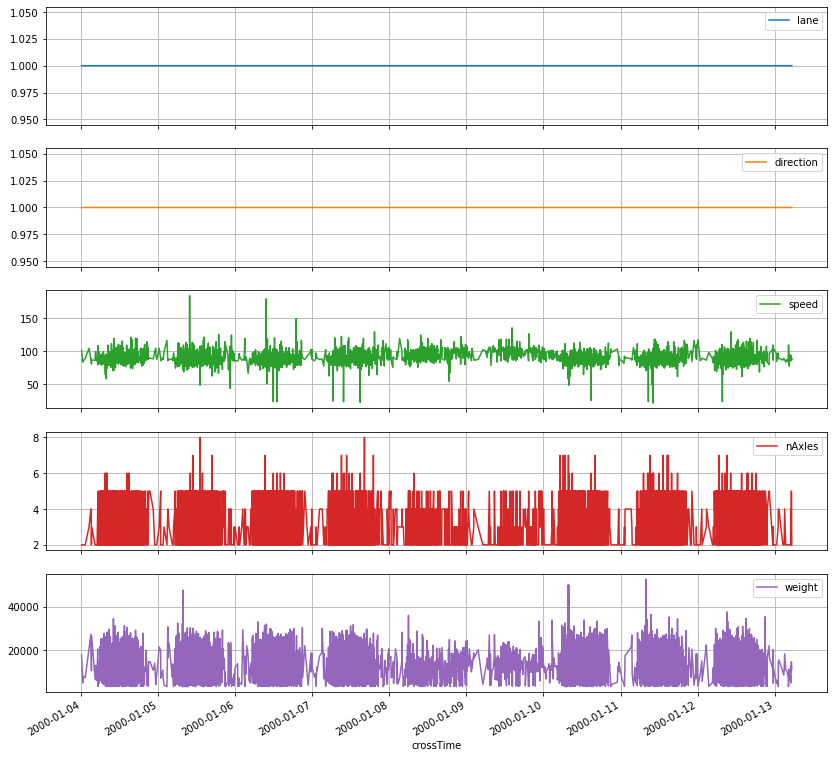

In [117]:
plot_cols = [col for col in columns if col != 'crossTime']

plot_features = df[plot_cols]
plot_features.index = df.crossTime

plot_features.plot(subplots=True, figsize=(14, 14), grid=True)
plt.show()

Downsample the series into 1 hour bins and compute the mean of the values of the timestamps falling into a bin.

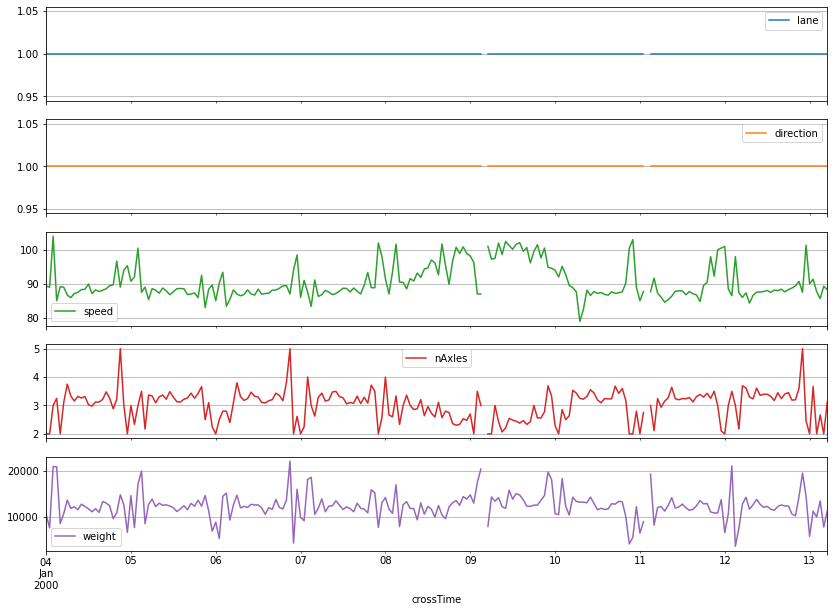

In [143]:
plot_features.resample('1h').mean().plot(subplots=True, grid=True)
plt.show()

Convert categorical variable into dummy variables + plot

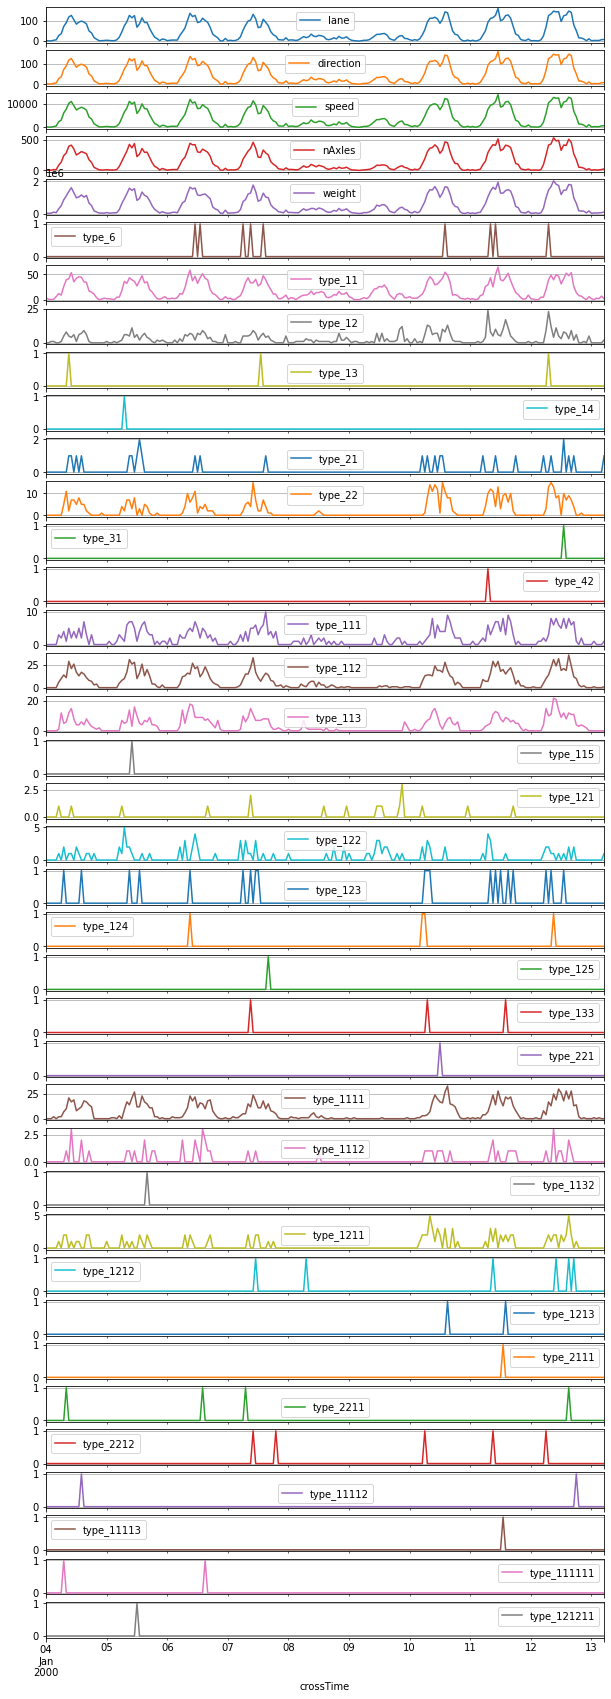

In [139]:
pd.get_dummies(plot_features).resample('1h').sum().plot(subplots=True, figsize=(10, 30), grid=True)
plt.show()